Tema 2 ML Nucuta Diana Cristina 344 C1

In [1]:

import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [2]:
abnormal = pd.read_csv("ptbdb_abnormal_data.csv", header = None) 
normal = pd.read_csv("ptbdb_normal_data.csv", header = None)
abnormal = abnormal.drop([187], axis=1)
normal = normal.drop([187], axis=1)


In [3]:
y_abnormal = pd.DataFrame(np.ones((abnormal.shape[0])))

y_normal = pd.DataFrame(np.zeros((normal.shape[0])))

X = pd.concat([abnormal, normal], sort=True)
y = pd.concat([y_abnormal, y_normal] ,sort=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



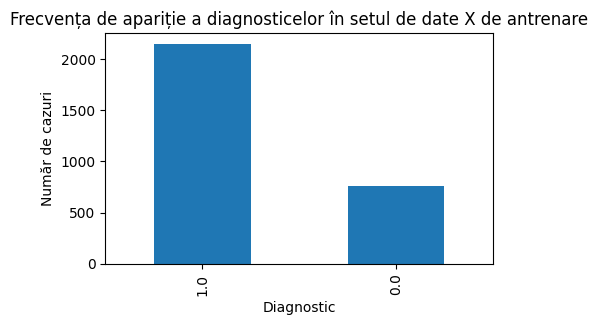

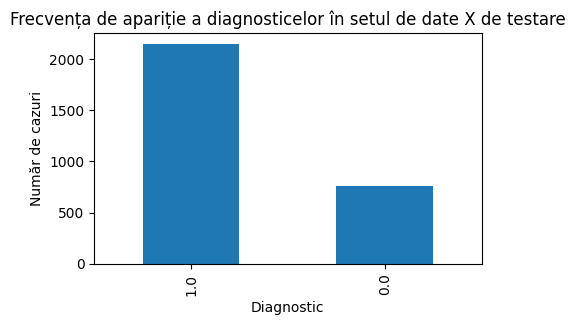

In [4]:
freq_diagnostic_train_x = y_test[0].value_counts()

plt.figure(figsize=(5, 3))
freq_diagnostic_train_x.plot(kind='bar')
plt.title('Frecvența de apariție a diagnosticelor în setul de date X de antrenare')
plt.xlabel('Diagnostic')
plt.ylabel('Număr de cazuri')
plt.show()

freq_diagnostic_test_x = y_test[0].value_counts()

plt.figure(figsize=(5, 3))
freq_diagnostic_test_x.plot(kind='bar')
plt.title('Frecvența de apariție a diagnosticelor în setul de date X de testare')
plt.xlabel('Diagnostic')
plt.ylabel('Număr de cazuri')
plt.show()



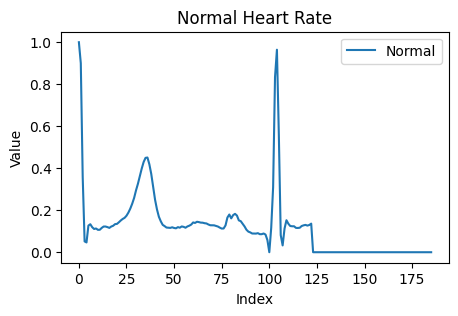

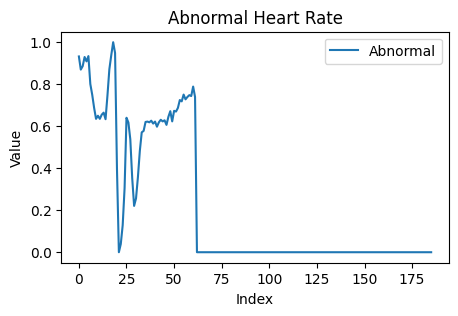

In [5]:
plt.figure(figsize=(5, 3))
plt.plot((normal.values)[0][0:186], label='Normal')
plt.legend() 
plt.xlabel('Index')  
plt.ylabel('Value')  
plt.title('Normal Heart Rate')  
plt.show() 

plt.figure(figsize=(5, 3))  
plt.plot((abnormal.values)[0][0:186], label='Abnormal')
plt.legend() 
plt.xlabel('Index') 
plt.ylabel('Value')  
plt.title('Abnormal Heart Rate')  

plt.show()  

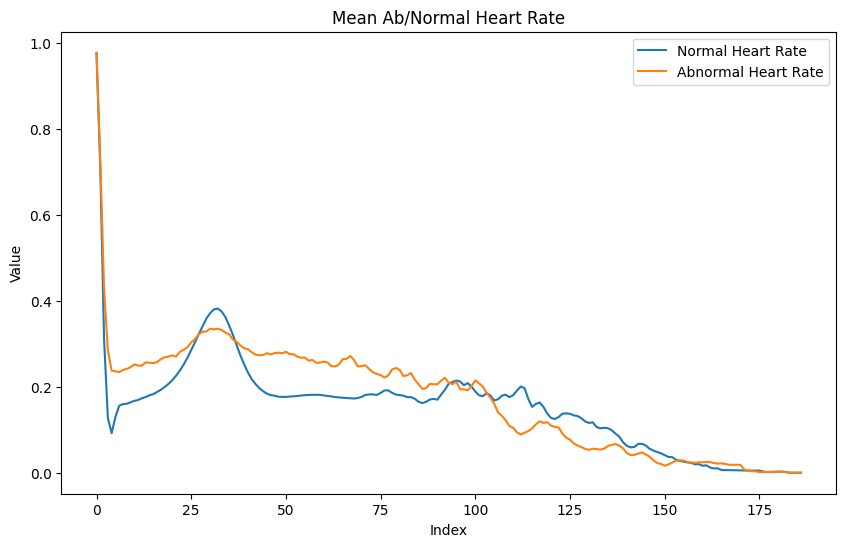

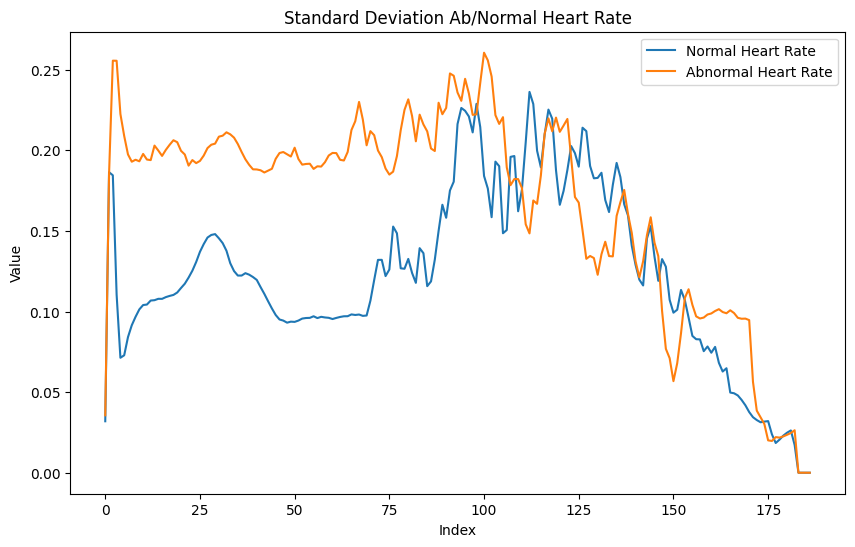

In [6]:
mean_normal_array = []
mean_abnormal_array = []
for i, j in zip(normal, abnormal):
    row_value_i = 0
    row_value_j = 0
    for time_unit in range(187):
        row_value_i += normal[i][time_unit]
        row_value_j += abnormal[j][time_unit]
    mean_normal_array.append(row_value_i/187)
    mean_abnormal_array.append(row_value_j/187)

plt.figure(figsize=(10, 6))  
plt.plot(mean_normal_array, label='Normal Heart Rate')
plt.plot(mean_abnormal_array, label='Abnormal Heart Rate')
plt.legend() 
plt.xlabel('Index') 
plt.ylabel('Value')  
plt.title('Mean Ab/Normal Heart Rate')  

plt.show()

standard_deviation_normal_array = []
standard_deviation_abnormal_array = []
for i, j in zip(normal, abnormal):
    row_value_i = 0
    row_value_j = 0 
    for time_unit in range(187):
        row_value_i += (normal[i][time_unit] - mean_normal_array[i])**2
        row_value_j += (abnormal[j][time_unit] - mean_abnormal_array[j])**2
    standard_deviation_normal_array.append(np.sqrt(row_value_i/187))
    standard_deviation_abnormal_array.append(np.sqrt(row_value_j/187))

plt.figure(figsize=(10, 6))
plt.plot(standard_deviation_normal_array, label='Normal Heart Rate')
plt.plot(standard_deviation_abnormal_array, label='Abnormal Heart Rate')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Standard Deviation Ab/Normal Heart Rate')
plt.show()


In [7]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd


dataset = pd.read_csv('patients.csv')
columns = ['Transportation', 'Regular_fiber_diet', 'Diagnostic_in_family_history', 'High_calorie_diet',
           'Sedentary_hours_daily', 'Age', 'Alcohol', 'Est_avg_calorie_intake', 'Main_meals_daily', 'Snacks',
           'Height', 'Smoker', 'Water_daily', 'Calorie_monitoring', 'Weight', 'Physical_activity_level',
           'Technology_time_use', 'Gender', 'Diagnostic']
float_columns = ["Sedentary_hours_daily", "Height", "Weight"]
numeric_columns= ["Regular_fiber_diet" , "Sedentary_hours_daily" , "Age" , "Est_avg_calorie_intake" , "Main_meals_daily" , "Height", "Water_daily", "Weight", 
                  "Physical_activity_level" , "Technology_time_use"]
nominal_columns = ['Transportation', 'Diagnostic_in_family_history', 'High_calorie_diet',
                    'Alcohol', 'Snacks', 'Smoker','Calorie_monitoring', 'Gender', 'Diagnostic']
def string_to_float(word):
    if isinstance(word, int) or isinstance(word, float):
        return word
    if ',' in word:
        parts = word.split(',')
        whole_part = parts[0]
        fractional_part = parts[1]
        number_str = whole_part + '.' + fractional_part
        return float(number_str)
    else:
        return float(word)

converted_numeric_columns = dataset[numeric_columns].applymap(string_to_float)

def remove_outliers(df, numeric_columns, threshold=4):
    for column in numeric_columns:
        z_scores = np.abs(zscore(df[column]))
        df = df[(z_scores < threshold)]
    return df

converted_numeric_df = pd.DataFrame(converted_numeric_columns, columns=numeric_columns)

label_encoders = {}
for col in nominal_columns:
    label_encoders[col] = LabelEncoder()

encoded_nominal_cols = {}
for col in nominal_columns:
    encoded_nominal_cols[col] = label_encoders[col].fit_transform(dataset[col])

encoded_nominal_df = pd.DataFrame(encoded_nominal_cols)

nominal_data = dataset[nominal_columns]

new_dataset = pd.concat([encoded_nominal_df, converted_numeric_df], axis=1)

new_dataset = remove_outliers(new_dataset, numeric_columns)

constant_imputer = SimpleImputer(strategy='constant', fill_value=0)
new_dataset['Weight'] = constant_imputer.fit_transform(new_dataset[['Weight']])

new_dataset[numeric_columns] =  StandardScaler().fit_transform(new_dataset[numeric_columns])

X_train_patient, X_test_patient, y_train_patient, y_test_patient = train_test_split(new_dataset.drop('Diagnostic', axis=1), new_dataset['Diagnostic'], test_size=0.2)

C:\Users\diana\AppData\Local\Temp\ipykernel_5768\1613389840.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  converted_numeric_columns = dataset[numeric_columns].applymap(string_to_float)


Epochs: 100 - Batch Size: 1 - Learning Rate: 1e-05
Epoch 1/100 - Train Accuracy: 0.1230 - Test Accuracy: 0.1175 - Loss: 2.2946
Epoch 11/100 - Train Accuracy: 0.1602 - Test Accuracy: 0.1410 - Loss: 1.9518
Epoch 21/100 - Train Accuracy: 0.1615 - Test Accuracy: 0.1410 - Loss: 1.6131
Epoch 31/100 - Train Accuracy: 0.2341 - Test Accuracy: 0.2350 - Loss: 1.2732
Epoch 41/100 - Train Accuracy: 0.3322 - Test Accuracy: 0.2977 - Loss: 0.9790
Epoch 51/100 - Train Accuracy: 0.3394 - Test Accuracy: 0.2898 - Loss: 0.7434
Epoch 61/100 - Train Accuracy: 0.3564 - Test Accuracy: 0.3003 - Loss: 0.5672
Epoch 71/100 - Train Accuracy: 0.3630 - Test Accuracy: 0.3133 - Loss: 0.4434
Epoch 81/100 - Train Accuracy: 0.3663 - Test Accuracy: 0.3290 - Loss: 0.3543
Epoch 91/100 - Train Accuracy: 0.3689 - Test Accuracy: 0.3420 - Loss: 0.2916


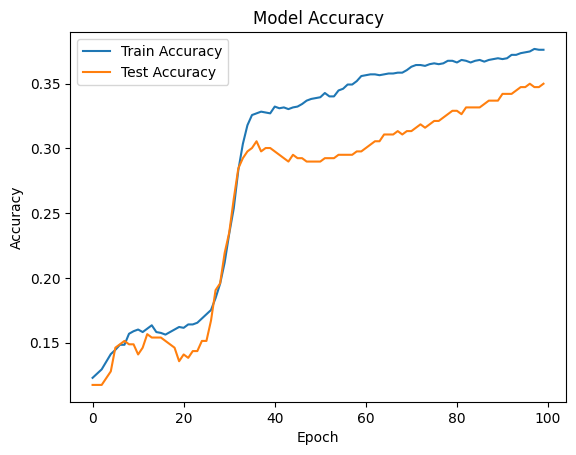

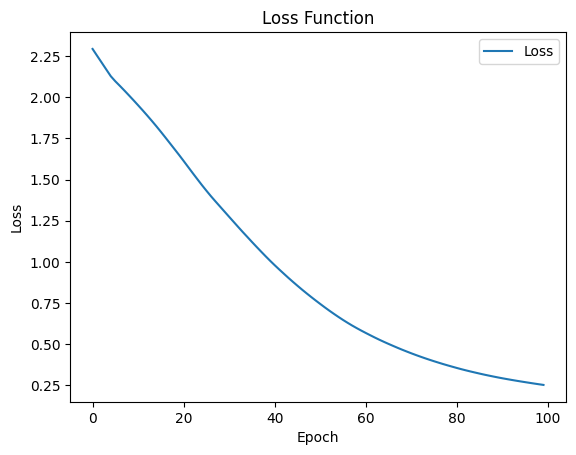

Epochs: 100 - Batch Size: 1 - Learning Rate: 0.0001
Epoch 1/100 - Train Accuracy: 0.1609 - Test Accuracy: 0.1462 - Loss: 1.9778
Epoch 11/100 - Train Accuracy: 0.3918 - Test Accuracy: 0.3812 - Loss: 0.2088
Epoch 21/100 - Train Accuracy: 0.4846 - Test Accuracy: 0.5039 - Loss: 0.0786
Epoch 31/100 - Train Accuracy: 0.5069 - Test Accuracy: 0.5614 - Loss: 0.0505
Epoch 41/100 - Train Accuracy: 0.5428 - Test Accuracy: 0.5744 - Loss: 0.0535
Epoch 51/100 - Train Accuracy: 0.5736 - Test Accuracy: 0.6057 - Loss: 0.0529
Epoch 61/100 - Train Accuracy: 0.5939 - Test Accuracy: 0.6501 - Loss: 0.0462
Epoch 71/100 - Train Accuracy: 0.6109 - Test Accuracy: 0.6501 - Loss: 0.0542
Epoch 81/100 - Train Accuracy: 0.6259 - Test Accuracy: 0.6658 - Loss: 0.0488
Epoch 91/100 - Train Accuracy: 0.6508 - Test Accuracy: 0.6606 - Loss: 0.0452


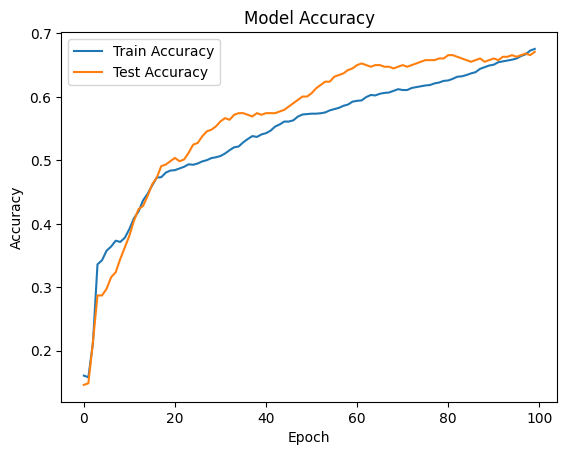

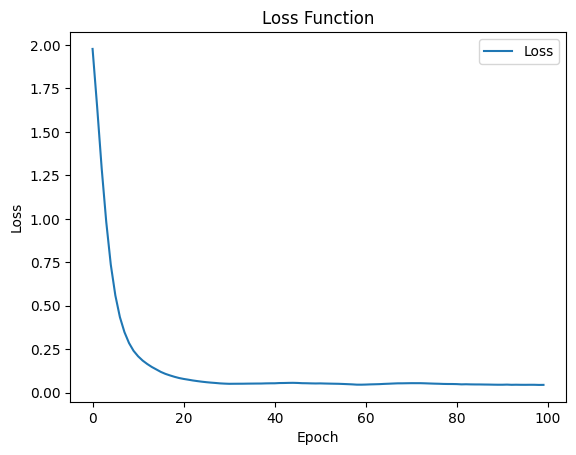

Epochs: 100 - Batch Size: 1 - Learning Rate: 0.001
Epoch 1/100 - Train Accuracy: 0.3937 - Test Accuracy: 0.3708 - Loss: 0.1526
Epoch 11/100 - Train Accuracy: 0.6965 - Test Accuracy: 0.6736 - Loss: 0.0102
Epoch 21/100 - Train Accuracy: 0.8555 - Test Accuracy: 0.8225 - Loss: 0.0094
Epoch 31/100 - Train Accuracy: 0.9045 - Test Accuracy: 0.8407 - Loss: 0.0085
Epoch 41/100 - Train Accuracy: 0.9163 - Test Accuracy: 0.8460 - Loss: 0.0096
Epoch 51/100 - Train Accuracy: 0.9222 - Test Accuracy: 0.8486 - Loss: 0.0104
Epoch 61/100 - Train Accuracy: 0.9228 - Test Accuracy: 0.8590 - Loss: 0.0111
Epoch 71/100 - Train Accuracy: 0.9294 - Test Accuracy: 0.8564 - Loss: 0.0117
Epoch 81/100 - Train Accuracy: 0.9267 - Test Accuracy: 0.8460 - Loss: 0.0125
Epoch 91/100 - Train Accuracy: 0.9274 - Test Accuracy: 0.8486 - Loss: 0.0129


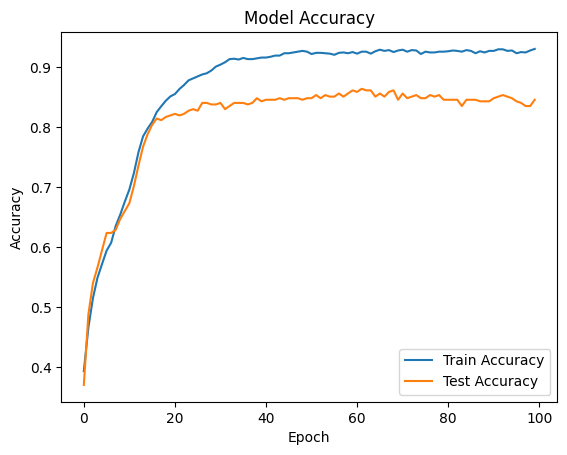

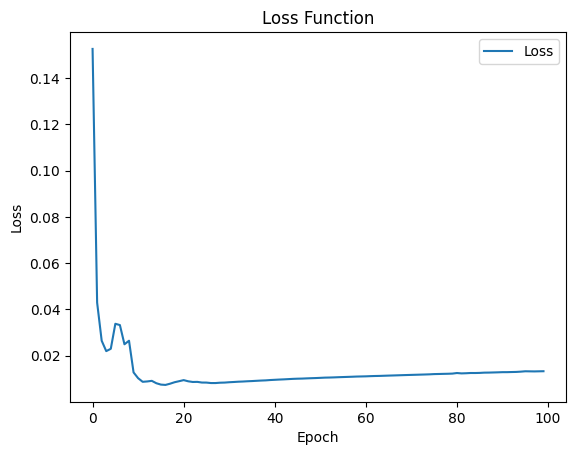

Epochs: 100 - Batch Size: 1 - Learning Rate: 0.01
Epoch 1/100 - Train Accuracy: 0.5945 - Test Accuracy: 0.5796 - Loss: 0.0152
Epoch 11/100 - Train Accuracy: 0.8156 - Test Accuracy: 0.8094 - Loss: 0.0169
Epoch 21/100 - Train Accuracy: 0.8313 - Test Accuracy: 0.8225 - Loss: 0.0226
Epoch 31/100 - Train Accuracy: 0.8620 - Test Accuracy: 0.8564 - Loss: 0.0252
Epoch 41/100 - Train Accuracy: 0.8542 - Test Accuracy: 0.8460 - Loss: 0.0282
Epoch 51/100 - Train Accuracy: 0.8391 - Test Accuracy: 0.8198 - Loss: 0.0297
Epoch 61/100 - Train Accuracy: 0.8725 - Test Accuracy: 0.8616 - Loss: 0.0316
Epoch 71/100 - Train Accuracy: 0.8293 - Test Accuracy: 0.8225 - Loss: 0.0330
Epoch 81/100 - Train Accuracy: 0.8705 - Test Accuracy: 0.8512 - Loss: 0.0369
Epoch 91/100 - Train Accuracy: 0.8378 - Test Accuracy: 0.8094 - Loss: 0.0387


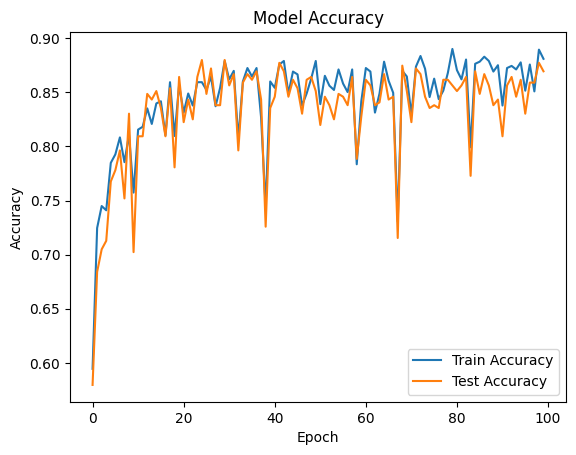

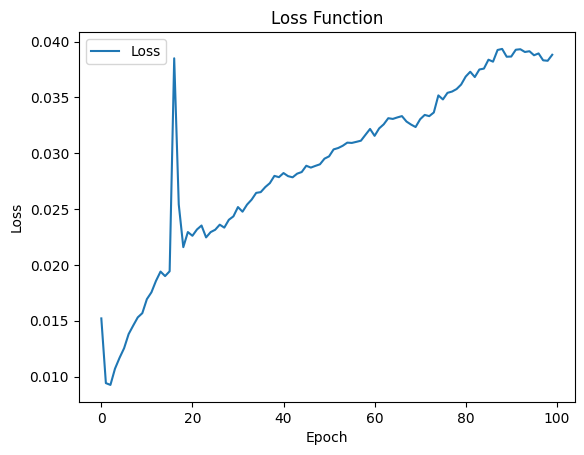

Epochs: 100 - Batch Size: 5 - Learning Rate: 1e-05
Epoch 1/100 - Train Accuracy: 0.1249 - Test Accuracy: 0.1149 - Loss: 2.0209
Epoch 11/100 - Train Accuracy: 0.1347 - Test Accuracy: 0.1227 - Loss: 1.9243
Epoch 21/100 - Train Accuracy: 0.1504 - Test Accuracy: 0.1514 - Loss: 1.8974
Epoch 31/100 - Train Accuracy: 0.1570 - Test Accuracy: 0.1488 - Loss: 1.8828
Epoch 41/100 - Train Accuracy: 0.1557 - Test Accuracy: 0.1540 - Loss: 1.8751
Epoch 51/100 - Train Accuracy: 0.1609 - Test Accuracy: 0.1384 - Loss: 1.8754
Epoch 61/100 - Train Accuracy: 0.1681 - Test Accuracy: 0.1567 - Loss: 1.8762
Epoch 71/100 - Train Accuracy: 0.2021 - Test Accuracy: 0.2010 - Loss: 1.8758
Epoch 81/100 - Train Accuracy: 0.2937 - Test Accuracy: 0.2846 - Loss: 1.8738
Epoch 91/100 - Train Accuracy: 0.3264 - Test Accuracy: 0.3055 - Loss: 1.8633


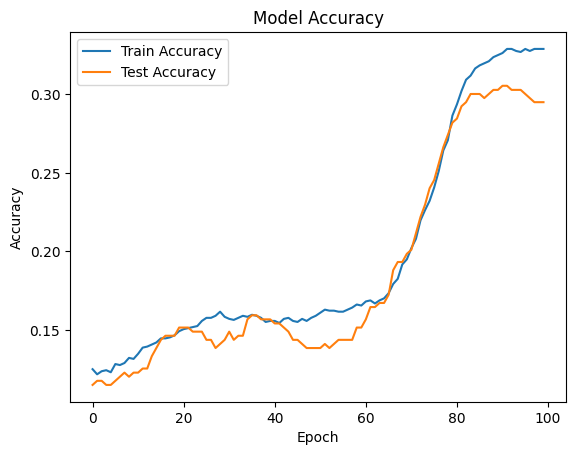

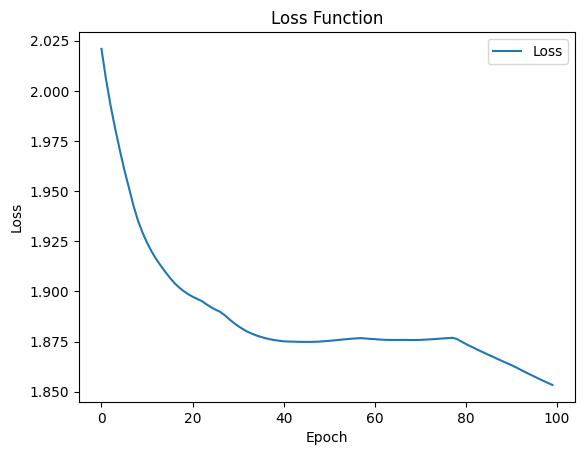

Epochs: 100 - Batch Size: 5 - Learning Rate: 0.0001
Epoch 1/100 - Train Accuracy: 0.1328 - Test Accuracy: 0.1227 - Loss: 1.9306
Epoch 11/100 - Train Accuracy: 0.3336 - Test Accuracy: 0.2820 - Loss: 1.8398
Epoch 21/100 - Train Accuracy: 0.3748 - Test Accuracy: 0.3446 - Loss: 1.6850
Epoch 31/100 - Train Accuracy: 0.4297 - Test Accuracy: 0.4282 - Loss: 1.5118
Epoch 41/100 - Train Accuracy: 0.4781 - Test Accuracy: 0.4935 - Loss: 1.3777
Epoch 51/100 - Train Accuracy: 0.4925 - Test Accuracy: 0.5144 - Loss: 1.2803
Epoch 61/100 - Train Accuracy: 0.5056 - Test Accuracy: 0.5405 - Loss: 1.2151
Epoch 71/100 - Train Accuracy: 0.5213 - Test Accuracy: 0.5666 - Loss: 1.1664
Epoch 81/100 - Train Accuracy: 0.5363 - Test Accuracy: 0.5744 - Loss: 1.1159
Epoch 91/100 - Train Accuracy: 0.5487 - Test Accuracy: 0.5849 - Loss: 1.0607


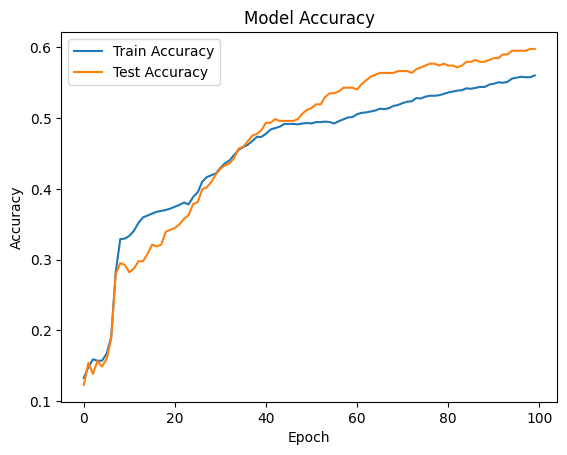

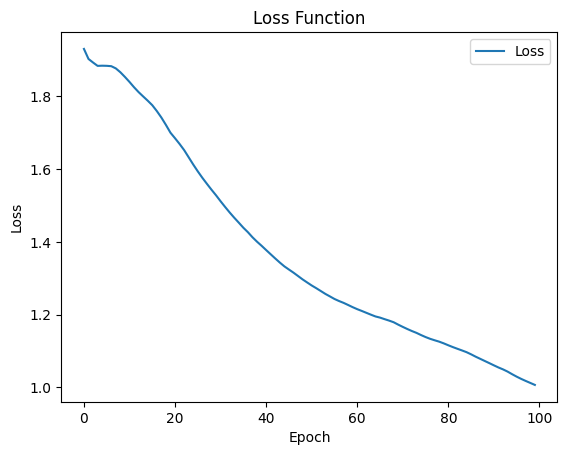

Epochs: 100 - Batch Size: 5 - Learning Rate: 0.001
Epoch 1/100 - Train Accuracy: 0.3460 - Test Accuracy: 0.3107 - Loss: 1.9202
Epoch 11/100 - Train Accuracy: 0.5945 - Test Accuracy: 0.6292 - Loss: 0.8904
Epoch 21/100 - Train Accuracy: 0.6645 - Test Accuracy: 0.6736 - Loss: 0.3763
Epoch 31/100 - Train Accuracy: 0.7469 - Test Accuracy: 0.7493 - Loss: 0.1919
Epoch 41/100 - Train Accuracy: 0.8136 - Test Accuracy: 0.8094 - Loss: 0.1211
Epoch 51/100 - Train Accuracy: 0.8509 - Test Accuracy: 0.8329 - Loss: 0.0880
Epoch 61/100 - Train Accuracy: 0.8770 - Test Accuracy: 0.8355 - Loss: 0.0747
Epoch 71/100 - Train Accuracy: 0.8869 - Test Accuracy: 0.8486 - Loss: 0.0968
Epoch 81/100 - Train Accuracy: 0.8927 - Test Accuracy: 0.8512 - Loss: 0.1087
Epoch 91/100 - Train Accuracy: 0.8921 - Test Accuracy: 0.8407 - Loss: 0.1157


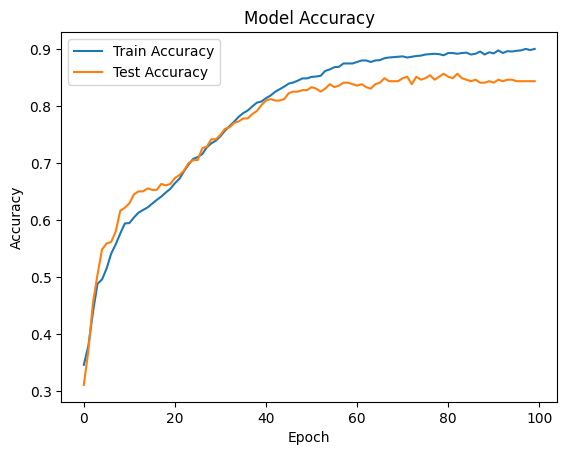

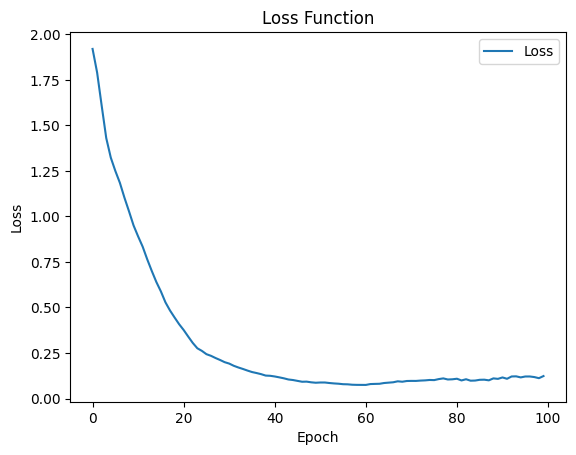

Epochs: 100 - Batch Size: 5 - Learning Rate: 0.01
Epoch 1/100 - Train Accuracy: 0.4879 - Test Accuracy: 0.5379 - Loss: 1.4065
Epoch 11/100 - Train Accuracy: 0.7044 - Test Accuracy: 0.6345 - Loss: 0.4331
Epoch 21/100 - Train Accuracy: 0.8371 - Test Accuracy: 0.7963 - Loss: 0.4458
Epoch 31/100 - Train Accuracy: 0.8731 - Test Accuracy: 0.8094 - Loss: 0.4141
Epoch 41/100 - Train Accuracy: 0.8725 - Test Accuracy: 0.7885 - Loss: 0.1500
Epoch 51/100 - Train Accuracy: 0.8960 - Test Accuracy: 0.8303 - Loss: 0.3669
Epoch 61/100 - Train Accuracy: 0.8869 - Test Accuracy: 0.8251 - Loss: 0.1488
Epoch 71/100 - Train Accuracy: 0.9097 - Test Accuracy: 0.8355 - Loss: 0.1326
Epoch 81/100 - Train Accuracy: 0.9084 - Test Accuracy: 0.8329 - Loss: 0.1613
Epoch 91/100 - Train Accuracy: 0.9182 - Test Accuracy: 0.8251 - Loss: 0.1791


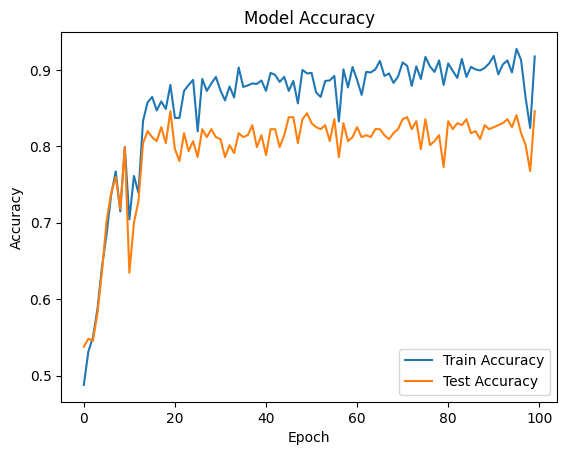

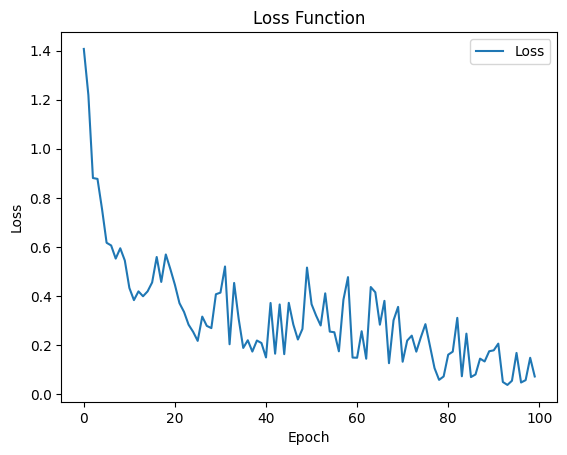

Epochs: 100 - Batch Size: 10 - Learning Rate: 1e-05
Epoch 1/100 - Train Accuracy: 0.1236 - Test Accuracy: 0.1149 - Loss: 2.2106
Epoch 11/100 - Train Accuracy: 0.1275 - Test Accuracy: 0.1227 - Loss: 2.1101
Epoch 21/100 - Train Accuracy: 0.1400 - Test Accuracy: 0.1253 - Loss: 2.0528
Epoch 31/100 - Train Accuracy: 0.1465 - Test Accuracy: 0.1488 - Loss: 2.0120
Epoch 41/100 - Train Accuracy: 0.1511 - Test Accuracy: 0.1488 - Loss: 1.9788
Epoch 51/100 - Train Accuracy: 0.1576 - Test Accuracy: 0.1436 - Loss: 1.9543
Epoch 61/100 - Train Accuracy: 0.1543 - Test Accuracy: 0.1540 - Loss: 1.9350
Epoch 71/100 - Train Accuracy: 0.1550 - Test Accuracy: 0.1410 - Loss: 1.9137
Epoch 81/100 - Train Accuracy: 0.1570 - Test Accuracy: 0.1436 - Loss: 1.8947
Epoch 91/100 - Train Accuracy: 0.1674 - Test Accuracy: 0.1567 - Loss: 1.8762


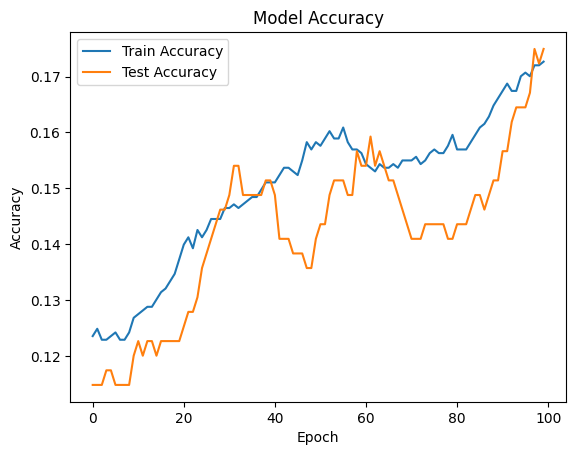

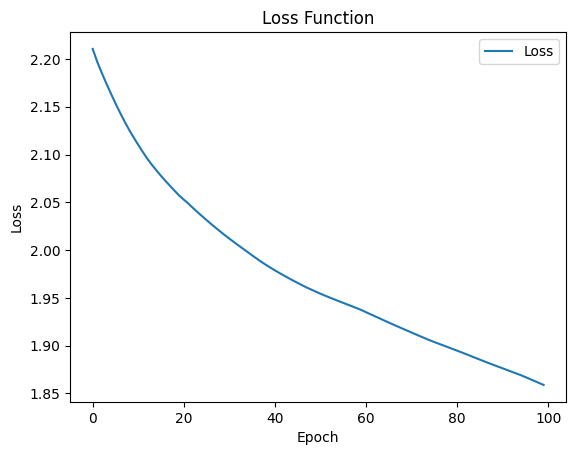

Epochs: 100 - Batch Size: 10 - Learning Rate: 0.0001
Epoch 1/100 - Train Accuracy: 0.1275 - Test Accuracy: 0.1227 - Loss: 2.1178
Epoch 11/100 - Train Accuracy: 0.2001 - Test Accuracy: 0.1984 - Loss: 1.8396
Epoch 21/100 - Train Accuracy: 0.3610 - Test Accuracy: 0.3029 - Loss: 1.5967
Epoch 31/100 - Train Accuracy: 0.3800 - Test Accuracy: 0.3551 - Loss: 1.4363
Epoch 41/100 - Train Accuracy: 0.4186 - Test Accuracy: 0.4151 - Loss: 1.3141
Epoch 51/100 - Train Accuracy: 0.4604 - Test Accuracy: 0.4569 - Loss: 1.2067
Epoch 61/100 - Train Accuracy: 0.4801 - Test Accuracy: 0.4987 - Loss: 1.1230
Epoch 71/100 - Train Accuracy: 0.4971 - Test Accuracy: 0.5326 - Loss: 1.0630
Epoch 81/100 - Train Accuracy: 0.4957 - Test Accuracy: 0.5587 - Loss: 1.0216
Epoch 91/100 - Train Accuracy: 0.5062 - Test Accuracy: 0.5692 - Loss: 0.9995


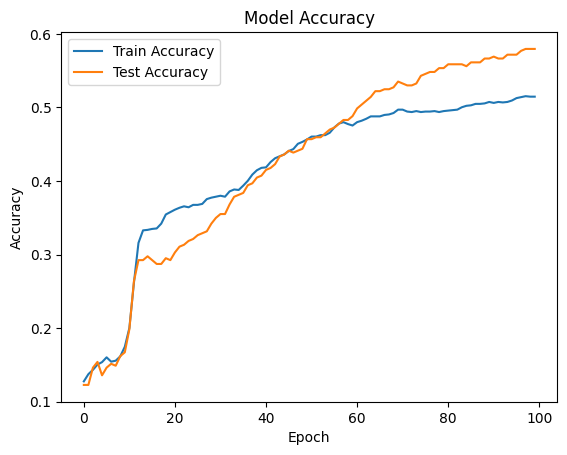

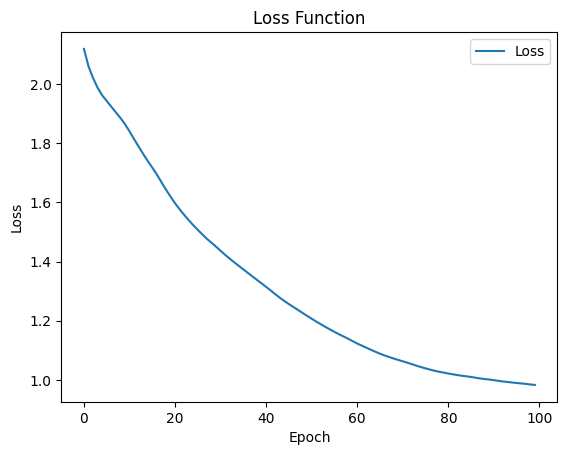

Epochs: 100 - Batch Size: 10 - Learning Rate: 0.001
Epoch 1/100 - Train Accuracy: 0.1746 - Test Accuracy: 0.1645 - Loss: 1.8885
Epoch 11/100 - Train Accuracy: 0.5389 - Test Accuracy: 0.5875 - Loss: 0.9719
Epoch 21/100 - Train Accuracy: 0.6239 - Test Accuracy: 0.6214 - Loss: 0.7973
Epoch 31/100 - Train Accuracy: 0.6416 - Test Accuracy: 0.6580 - Loss: 0.6517
Epoch 41/100 - Train Accuracy: 0.6835 - Test Accuracy: 0.6789 - Loss: 0.5300
Epoch 51/100 - Train Accuracy: 0.7417 - Test Accuracy: 0.7258 - Loss: 0.4418
Epoch 61/100 - Train Accuracy: 0.7802 - Test Accuracy: 0.7650 - Loss: 0.3992
Epoch 71/100 - Train Accuracy: 0.8051 - Test Accuracy: 0.7755 - Loss: 0.3658
Epoch 81/100 - Train Accuracy: 0.8411 - Test Accuracy: 0.7807 - Loss: 0.3026
Epoch 91/100 - Train Accuracy: 0.8666 - Test Accuracy: 0.8146 - Loss: 0.2476


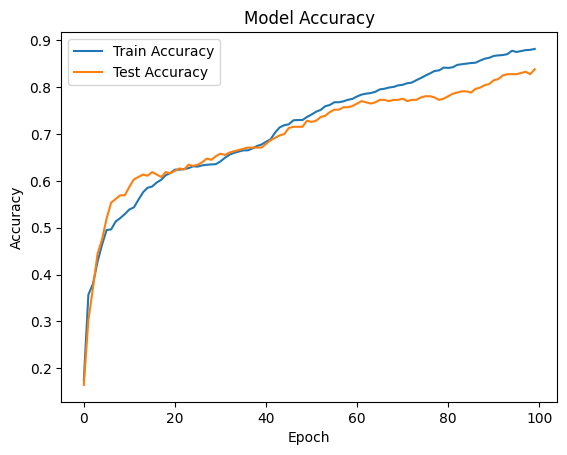

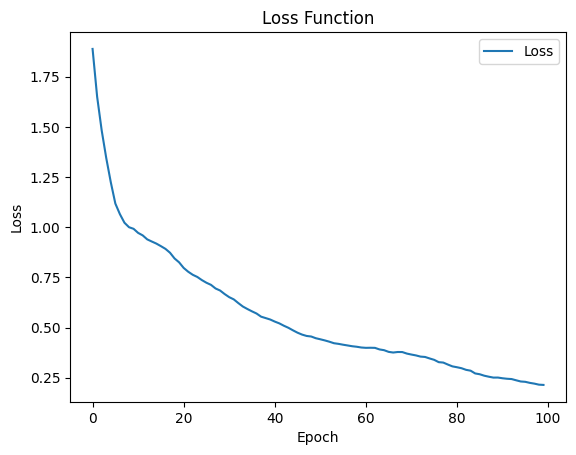

Epochs: 100 - Batch Size: 10 - Learning Rate: 0.01
Epoch 1/100 - Train Accuracy: 0.4598 - Test Accuracy: 0.4961 - Loss: 1.1544
Epoch 11/100 - Train Accuracy: 0.8470 - Test Accuracy: 0.7990 - Loss: 0.4903
Epoch 21/100 - Train Accuracy: 0.8568 - Test Accuracy: 0.7990 - Loss: 0.3440
Epoch 31/100 - Train Accuracy: 0.8954 - Test Accuracy: 0.8381 - Loss: 0.1936
Epoch 41/100 - Train Accuracy: 0.9117 - Test Accuracy: 0.8407 - Loss: 0.2203
Epoch 51/100 - Train Accuracy: 0.8940 - Test Accuracy: 0.8433 - Loss: 0.3511
Epoch 61/100 - Train Accuracy: 0.8313 - Test Accuracy: 0.7807 - Loss: 0.2123
Epoch 71/100 - Train Accuracy: 0.8927 - Test Accuracy: 0.8512 - Loss: 0.2201
Epoch 81/100 - Train Accuracy: 0.8712 - Test Accuracy: 0.8277 - Loss: 0.1444
Epoch 91/100 - Train Accuracy: 0.8816 - Test Accuracy: 0.8225 - Loss: 0.1875


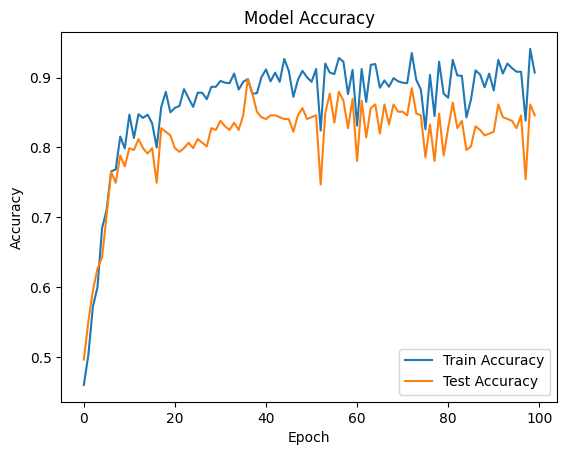

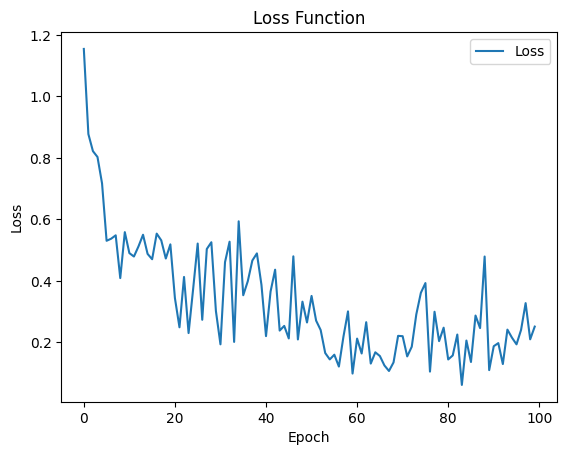

Epochs: 200 - Batch Size: 1 - Learning Rate: 1e-05
Epoch 1/200 - Train Accuracy: 0.1230 - Test Accuracy: 0.1175 - Loss: 2.2946
Epoch 11/200 - Train Accuracy: 0.1602 - Test Accuracy: 0.1410 - Loss: 1.9518
Epoch 21/200 - Train Accuracy: 0.1615 - Test Accuracy: 0.1410 - Loss: 1.6131
Epoch 31/200 - Train Accuracy: 0.2341 - Test Accuracy: 0.2350 - Loss: 1.2732
Epoch 41/200 - Train Accuracy: 0.3322 - Test Accuracy: 0.2977 - Loss: 0.9790
Epoch 51/200 - Train Accuracy: 0.3394 - Test Accuracy: 0.2898 - Loss: 0.7434
Epoch 61/200 - Train Accuracy: 0.3564 - Test Accuracy: 0.3003 - Loss: 0.5672
Epoch 71/200 - Train Accuracy: 0.3630 - Test Accuracy: 0.3133 - Loss: 0.4434
Epoch 81/200 - Train Accuracy: 0.3663 - Test Accuracy: 0.3290 - Loss: 0.3543
Epoch 91/200 - Train Accuracy: 0.3689 - Test Accuracy: 0.3420 - Loss: 0.2916
Epoch 101/200 - Train Accuracy: 0.3761 - Test Accuracy: 0.3499 - Loss: 0.2474
Epoch 111/200 - Train Accuracy: 0.3872 - Test Accuracy: 0.3734 - Loss: 0.2144
Epoch 121/200 - Train Ac

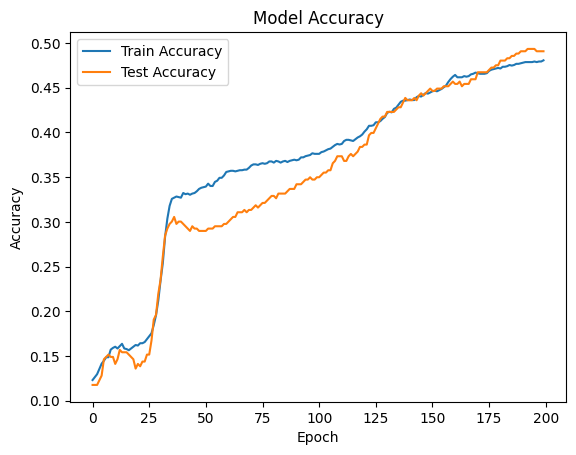

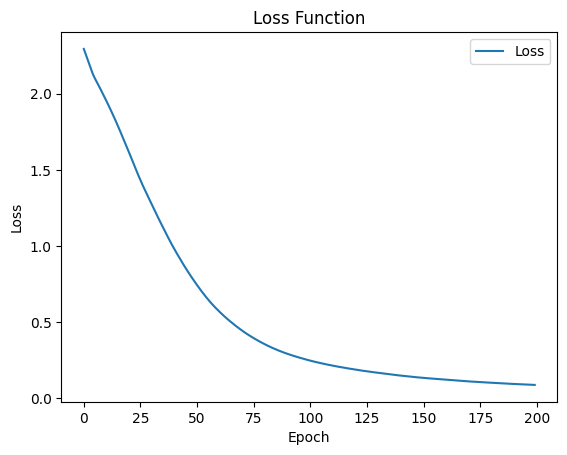

Epochs: 200 - Batch Size: 1 - Learning Rate: 0.0001
Epoch 1/200 - Train Accuracy: 0.1609 - Test Accuracy: 0.1462 - Loss: 1.9778
Epoch 11/200 - Train Accuracy: 0.3918 - Test Accuracy: 0.3812 - Loss: 0.2088
Epoch 21/200 - Train Accuracy: 0.4846 - Test Accuracy: 0.5039 - Loss: 0.0786
Epoch 31/200 - Train Accuracy: 0.5069 - Test Accuracy: 0.5614 - Loss: 0.0505
Epoch 41/200 - Train Accuracy: 0.5428 - Test Accuracy: 0.5744 - Loss: 0.0535
Epoch 51/200 - Train Accuracy: 0.5736 - Test Accuracy: 0.6057 - Loss: 0.0529
Epoch 61/200 - Train Accuracy: 0.5939 - Test Accuracy: 0.6501 - Loss: 0.0462
Epoch 71/200 - Train Accuracy: 0.6109 - Test Accuracy: 0.6501 - Loss: 0.0542
Epoch 81/200 - Train Accuracy: 0.6259 - Test Accuracy: 0.6658 - Loss: 0.0488
Epoch 91/200 - Train Accuracy: 0.6508 - Test Accuracy: 0.6606 - Loss: 0.0452
Epoch 101/200 - Train Accuracy: 0.6750 - Test Accuracy: 0.6710 - Loss: 0.0441
Epoch 111/200 - Train Accuracy: 0.6959 - Test Accuracy: 0.6841 - Loss: 0.0388
Epoch 121/200 - Train A

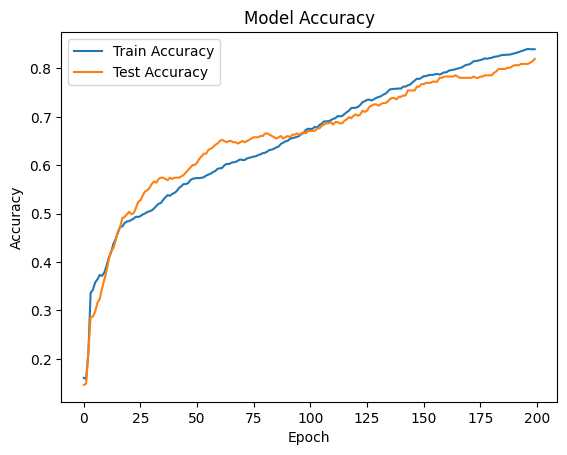

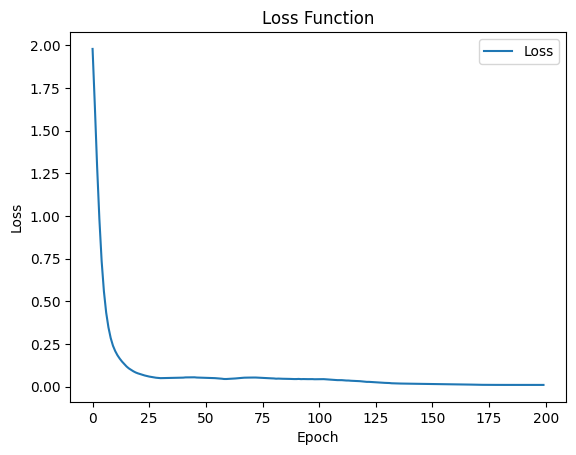

Epochs: 200 - Batch Size: 1 - Learning Rate: 0.001
Epoch 1/200 - Train Accuracy: 0.3937 - Test Accuracy: 0.3708 - Loss: 0.1526
Epoch 11/200 - Train Accuracy: 0.6965 - Test Accuracy: 0.6736 - Loss: 0.0102
Epoch 21/200 - Train Accuracy: 0.8555 - Test Accuracy: 0.8225 - Loss: 0.0094
Epoch 31/200 - Train Accuracy: 0.9045 - Test Accuracy: 0.8407 - Loss: 0.0085
Epoch 41/200 - Train Accuracy: 0.9163 - Test Accuracy: 0.8460 - Loss: 0.0096
Epoch 51/200 - Train Accuracy: 0.9222 - Test Accuracy: 0.8486 - Loss: 0.0104
Epoch 61/200 - Train Accuracy: 0.9228 - Test Accuracy: 0.8590 - Loss: 0.0111
Epoch 71/200 - Train Accuracy: 0.9294 - Test Accuracy: 0.8564 - Loss: 0.0117
Epoch 81/200 - Train Accuracy: 0.9267 - Test Accuracy: 0.8460 - Loss: 0.0125
Epoch 91/200 - Train Accuracy: 0.9274 - Test Accuracy: 0.8486 - Loss: 0.0129
Epoch 101/200 - Train Accuracy: 0.9281 - Test Accuracy: 0.8433 - Loss: 0.0134
Epoch 111/200 - Train Accuracy: 0.9300 - Test Accuracy: 0.8486 - Loss: 0.0138
Epoch 121/200 - Train Ac

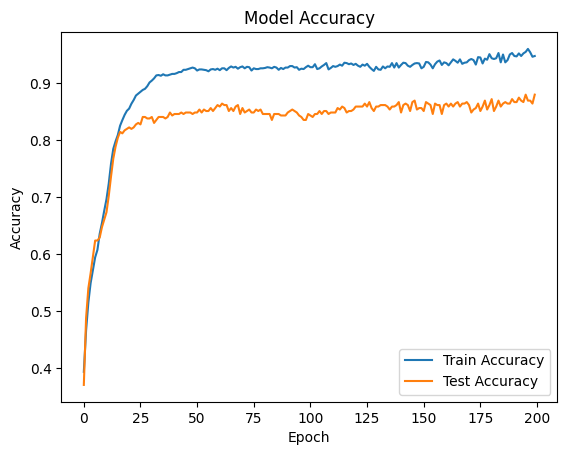

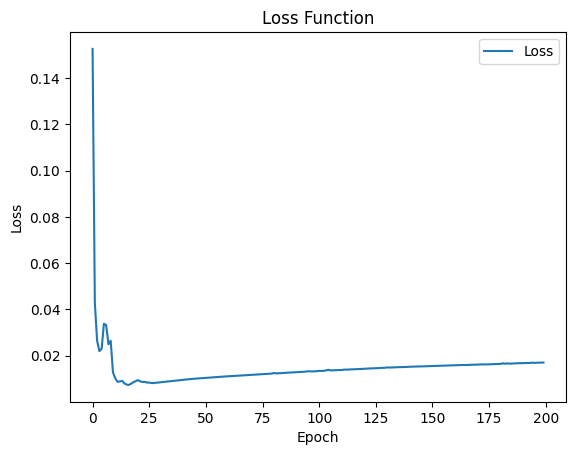

Epochs: 200 - Batch Size: 1 - Learning Rate: 0.01
Epoch 1/200 - Train Accuracy: 0.5945 - Test Accuracy: 0.5796 - Loss: 0.0152
Epoch 11/200 - Train Accuracy: 0.8156 - Test Accuracy: 0.8094 - Loss: 0.0169
Epoch 21/200 - Train Accuracy: 0.8313 - Test Accuracy: 0.8225 - Loss: 0.0226
Epoch 31/200 - Train Accuracy: 0.8620 - Test Accuracy: 0.8564 - Loss: 0.0252
Epoch 41/200 - Train Accuracy: 0.8542 - Test Accuracy: 0.8460 - Loss: 0.0282
Epoch 51/200 - Train Accuracy: 0.8391 - Test Accuracy: 0.8198 - Loss: 0.0297
Epoch 61/200 - Train Accuracy: 0.8725 - Test Accuracy: 0.8616 - Loss: 0.0316
Epoch 71/200 - Train Accuracy: 0.8293 - Test Accuracy: 0.8225 - Loss: 0.0330
Epoch 81/200 - Train Accuracy: 0.8705 - Test Accuracy: 0.8512 - Loss: 0.0369
Epoch 91/200 - Train Accuracy: 0.8378 - Test Accuracy: 0.8094 - Loss: 0.0387
Epoch 101/200 - Train Accuracy: 0.8757 - Test Accuracy: 0.8721 - Loss: 0.0386
Epoch 111/200 - Train Accuracy: 0.8777 - Test Accuracy: 0.8564 - Loss: 0.0398
Epoch 121/200 - Train Acc

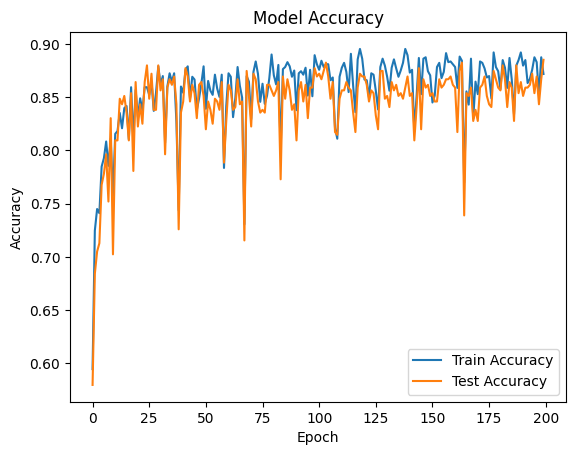

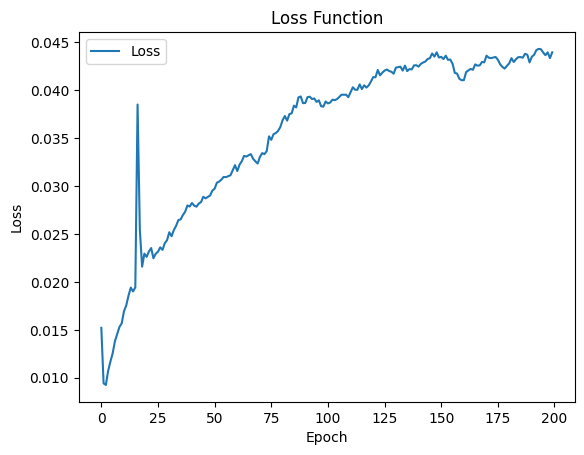

Epochs: 200 - Batch Size: 5 - Learning Rate: 1e-05
Epoch 1/200 - Train Accuracy: 0.1249 - Test Accuracy: 0.1149 - Loss: 2.0209
Epoch 11/200 - Train Accuracy: 0.1347 - Test Accuracy: 0.1227 - Loss: 1.9243
Epoch 21/200 - Train Accuracy: 0.1504 - Test Accuracy: 0.1514 - Loss: 1.8974
Epoch 31/200 - Train Accuracy: 0.1570 - Test Accuracy: 0.1488 - Loss: 1.8828
Epoch 41/200 - Train Accuracy: 0.1557 - Test Accuracy: 0.1540 - Loss: 1.8751
Epoch 51/200 - Train Accuracy: 0.1609 - Test Accuracy: 0.1384 - Loss: 1.8754
Epoch 61/200 - Train Accuracy: 0.1681 - Test Accuracy: 0.1567 - Loss: 1.8762
Epoch 71/200 - Train Accuracy: 0.2021 - Test Accuracy: 0.2010 - Loss: 1.8758
Epoch 81/200 - Train Accuracy: 0.2937 - Test Accuracy: 0.2846 - Loss: 1.8738
Epoch 91/200 - Train Accuracy: 0.3264 - Test Accuracy: 0.3055 - Loss: 1.8633
Epoch 101/200 - Train Accuracy: 0.3290 - Test Accuracy: 0.2950 - Loss: 1.8523
Epoch 111/200 - Train Accuracy: 0.3322 - Test Accuracy: 0.2846 - Loss: 1.8416
Epoch 121/200 - Train Ac

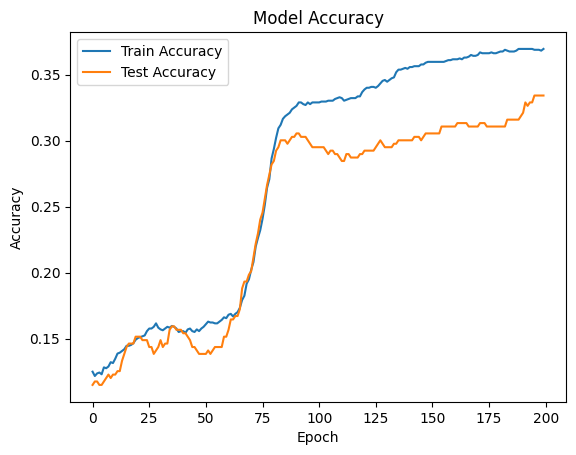

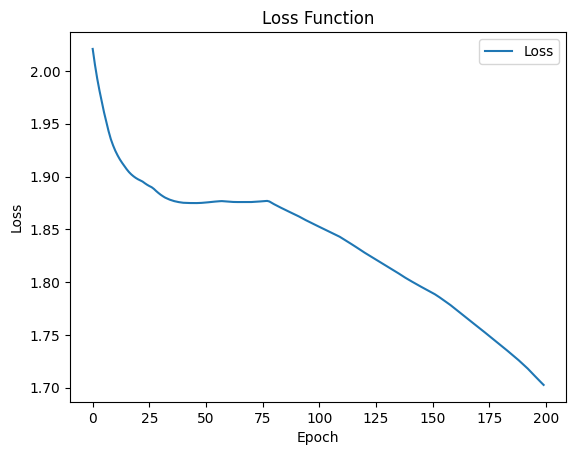

Epochs: 200 - Batch Size: 5 - Learning Rate: 0.0001
Epoch 1/200 - Train Accuracy: 0.1328 - Test Accuracy: 0.1227 - Loss: 1.9306
Epoch 11/200 - Train Accuracy: 0.3336 - Test Accuracy: 0.2820 - Loss: 1.8398
Epoch 21/200 - Train Accuracy: 0.3748 - Test Accuracy: 0.3446 - Loss: 1.6850
Epoch 31/200 - Train Accuracy: 0.4297 - Test Accuracy: 0.4282 - Loss: 1.5118
Epoch 41/200 - Train Accuracy: 0.4781 - Test Accuracy: 0.4935 - Loss: 1.3777
Epoch 51/200 - Train Accuracy: 0.4925 - Test Accuracy: 0.5144 - Loss: 1.2803
Epoch 61/200 - Train Accuracy: 0.5056 - Test Accuracy: 0.5405 - Loss: 1.2151
Epoch 71/200 - Train Accuracy: 0.5213 - Test Accuracy: 0.5666 - Loss: 1.1664
Epoch 81/200 - Train Accuracy: 0.5363 - Test Accuracy: 0.5744 - Loss: 1.1159
Epoch 91/200 - Train Accuracy: 0.5487 - Test Accuracy: 0.5849 - Loss: 1.0607
Epoch 101/200 - Train Accuracy: 0.5638 - Test Accuracy: 0.6005 - Loss: 1.0019
Epoch 111/200 - Train Accuracy: 0.5782 - Test Accuracy: 0.5927 - Loss: 0.9485
Epoch 121/200 - Train A

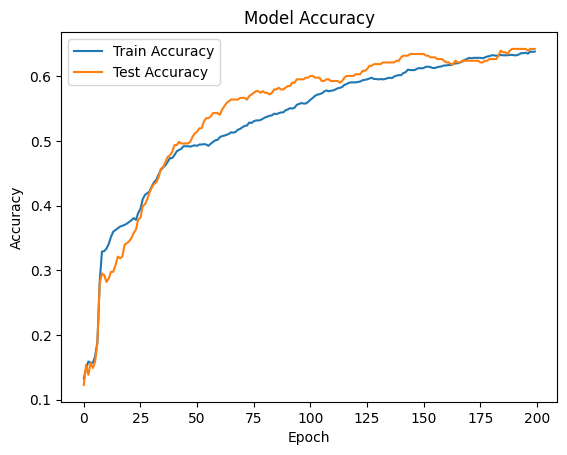

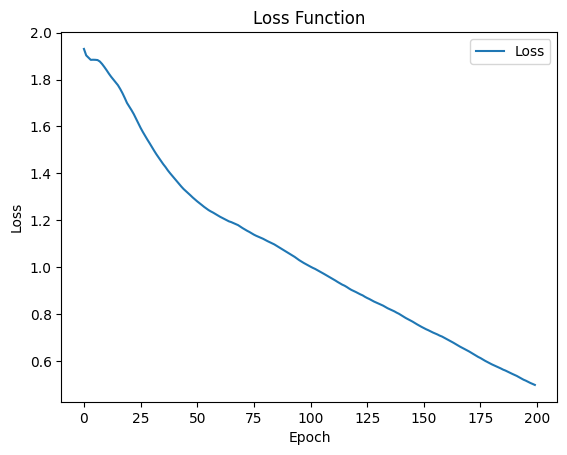

Epochs: 200 - Batch Size: 5 - Learning Rate: 0.001
Epoch 1/200 - Train Accuracy: 0.3460 - Test Accuracy: 0.3107 - Loss: 1.9202
Epoch 11/200 - Train Accuracy: 0.5945 - Test Accuracy: 0.6292 - Loss: 0.8904
Epoch 21/200 - Train Accuracy: 0.6645 - Test Accuracy: 0.6736 - Loss: 0.3763
Epoch 31/200 - Train Accuracy: 0.7469 - Test Accuracy: 0.7493 - Loss: 0.1919
Epoch 41/200 - Train Accuracy: 0.8136 - Test Accuracy: 0.8094 - Loss: 0.1211
Epoch 51/200 - Train Accuracy: 0.8509 - Test Accuracy: 0.8329 - Loss: 0.0880
Epoch 61/200 - Train Accuracy: 0.8770 - Test Accuracy: 0.8355 - Loss: 0.0747
Epoch 71/200 - Train Accuracy: 0.8869 - Test Accuracy: 0.8486 - Loss: 0.0968
Epoch 81/200 - Train Accuracy: 0.8927 - Test Accuracy: 0.8512 - Loss: 0.1087
Epoch 91/200 - Train Accuracy: 0.8921 - Test Accuracy: 0.8407 - Loss: 0.1157
Epoch 101/200 - Train Accuracy: 0.8999 - Test Accuracy: 0.8433 - Loss: 0.1179
Epoch 111/200 - Train Accuracy: 0.9058 - Test Accuracy: 0.8486 - Loss: 0.0865
Epoch 121/200 - Train Ac

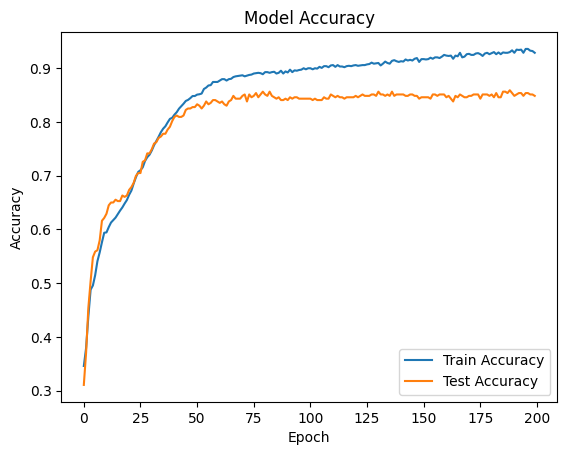

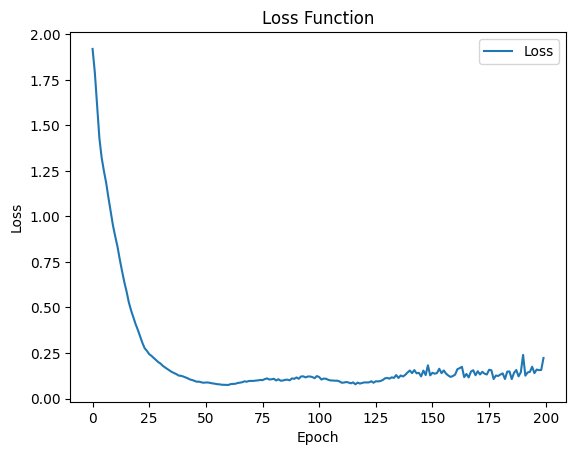

Epochs: 200 - Batch Size: 5 - Learning Rate: 0.01
Epoch 1/200 - Train Accuracy: 0.4879 - Test Accuracy: 0.5379 - Loss: 1.4065
Epoch 11/200 - Train Accuracy: 0.7044 - Test Accuracy: 0.6345 - Loss: 0.4331
Epoch 21/200 - Train Accuracy: 0.8371 - Test Accuracy: 0.7963 - Loss: 0.4458
Epoch 31/200 - Train Accuracy: 0.8731 - Test Accuracy: 0.8094 - Loss: 0.4141
Epoch 41/200 - Train Accuracy: 0.8725 - Test Accuracy: 0.7885 - Loss: 0.1500
Epoch 51/200 - Train Accuracy: 0.8960 - Test Accuracy: 0.8303 - Loss: 0.3669
Epoch 61/200 - Train Accuracy: 0.8869 - Test Accuracy: 0.8251 - Loss: 0.1488
Epoch 71/200 - Train Accuracy: 0.9097 - Test Accuracy: 0.8355 - Loss: 0.1326
Epoch 81/200 - Train Accuracy: 0.9084 - Test Accuracy: 0.8329 - Loss: 0.1613
Epoch 91/200 - Train Accuracy: 0.9182 - Test Accuracy: 0.8251 - Loss: 0.1791
Epoch 101/200 - Train Accuracy: 0.9182 - Test Accuracy: 0.8407 - Loss: 0.0467
Epoch 111/200 - Train Accuracy: 0.8823 - Test Accuracy: 0.7885 - Loss: 0.0929
Epoch 121/200 - Train Acc

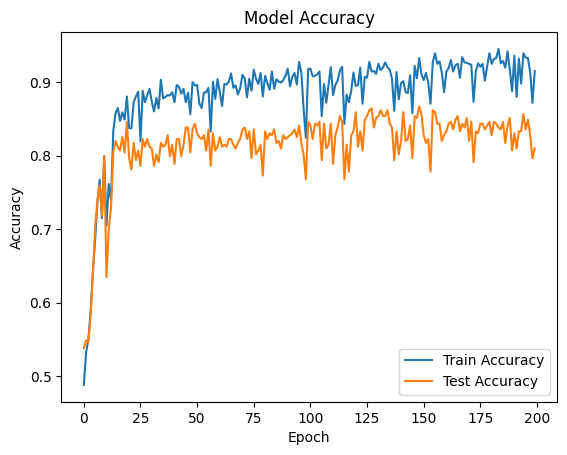

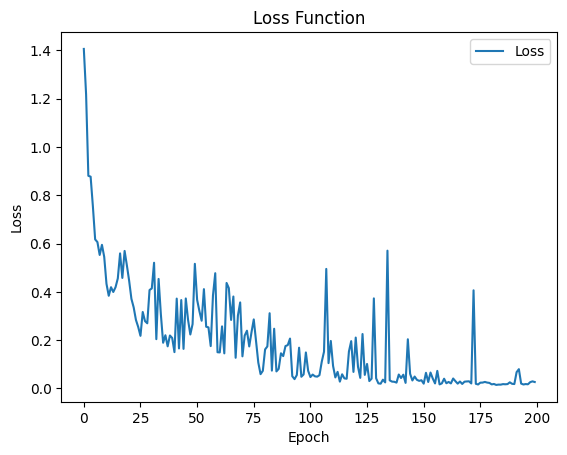

Epochs: 200 - Batch Size: 10 - Learning Rate: 1e-05
Epoch 1/200 - Train Accuracy: 0.1236 - Test Accuracy: 0.1149 - Loss: 2.2106
Epoch 11/200 - Train Accuracy: 0.1275 - Test Accuracy: 0.1227 - Loss: 2.1101
Epoch 21/200 - Train Accuracy: 0.1400 - Test Accuracy: 0.1253 - Loss: 2.0528
Epoch 31/200 - Train Accuracy: 0.1465 - Test Accuracy: 0.1488 - Loss: 2.0120
Epoch 41/200 - Train Accuracy: 0.1511 - Test Accuracy: 0.1488 - Loss: 1.9788
Epoch 51/200 - Train Accuracy: 0.1576 - Test Accuracy: 0.1436 - Loss: 1.9543
Epoch 61/200 - Train Accuracy: 0.1543 - Test Accuracy: 0.1540 - Loss: 1.9350
Epoch 71/200 - Train Accuracy: 0.1550 - Test Accuracy: 0.1410 - Loss: 1.9137
Epoch 81/200 - Train Accuracy: 0.1570 - Test Accuracy: 0.1436 - Loss: 1.8947
Epoch 91/200 - Train Accuracy: 0.1674 - Test Accuracy: 0.1567 - Loss: 1.8762
Epoch 101/200 - Train Accuracy: 0.1772 - Test Accuracy: 0.1828 - Loss: 1.8568
Epoch 111/200 - Train Accuracy: 0.2224 - Test Accuracy: 0.2272 - Loss: 1.8348
Epoch 121/200 - Train A

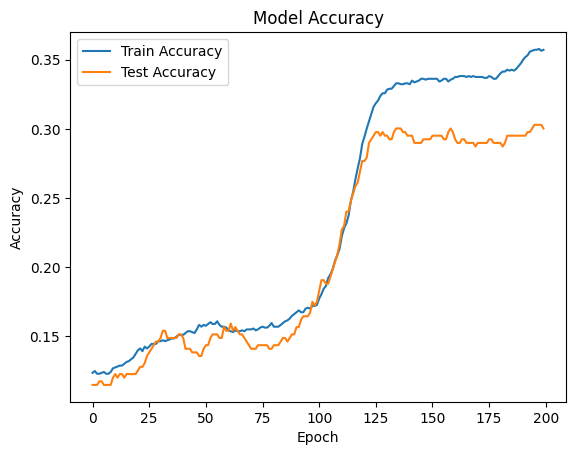

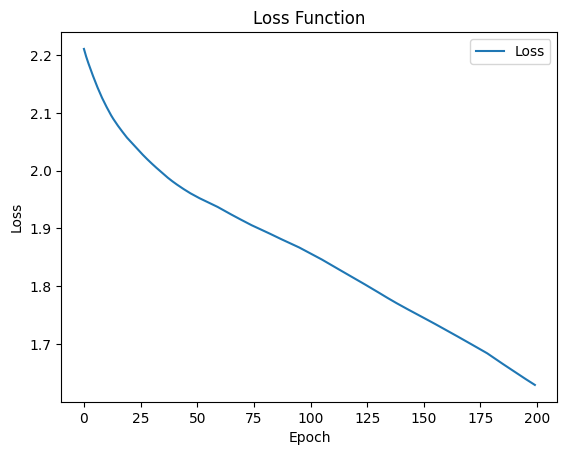

Epochs: 200 - Batch Size: 10 - Learning Rate: 0.0001
Epoch 1/200 - Train Accuracy: 0.1275 - Test Accuracy: 0.1227 - Loss: 2.1178
Epoch 11/200 - Train Accuracy: 0.2001 - Test Accuracy: 0.1984 - Loss: 1.8396
Epoch 21/200 - Train Accuracy: 0.3610 - Test Accuracy: 0.3029 - Loss: 1.5967
Epoch 31/200 - Train Accuracy: 0.3800 - Test Accuracy: 0.3551 - Loss: 1.4363
Epoch 41/200 - Train Accuracy: 0.4186 - Test Accuracy: 0.4151 - Loss: 1.3141
Epoch 51/200 - Train Accuracy: 0.4604 - Test Accuracy: 0.4569 - Loss: 1.2067
Epoch 61/200 - Train Accuracy: 0.4801 - Test Accuracy: 0.4987 - Loss: 1.1230
Epoch 71/200 - Train Accuracy: 0.4971 - Test Accuracy: 0.5326 - Loss: 1.0630
Epoch 81/200 - Train Accuracy: 0.4957 - Test Accuracy: 0.5587 - Loss: 1.0216
Epoch 91/200 - Train Accuracy: 0.5062 - Test Accuracy: 0.5692 - Loss: 0.9995
Epoch 101/200 - Train Accuracy: 0.5141 - Test Accuracy: 0.5796 - Loss: 0.9822
Epoch 111/200 - Train Accuracy: 0.5265 - Test Accuracy: 0.5796 - Loss: 0.9616
Epoch 121/200 - Train 

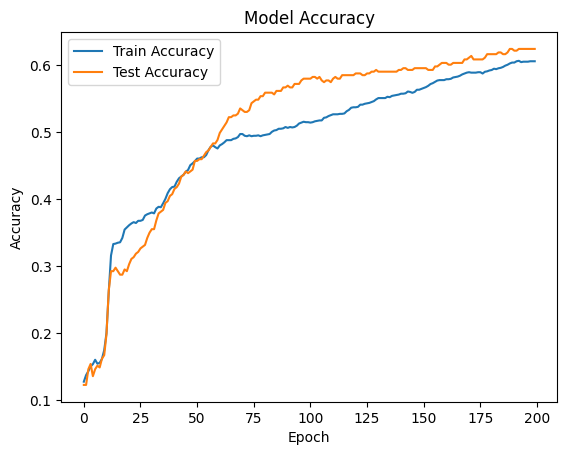

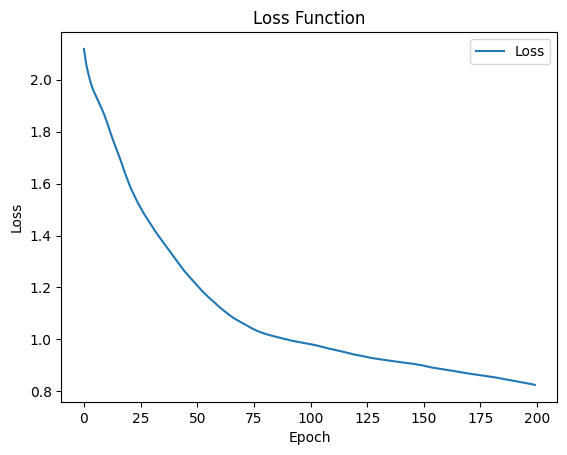

Epochs: 200 - Batch Size: 10 - Learning Rate: 0.001
Epoch 1/200 - Train Accuracy: 0.1746 - Test Accuracy: 0.1645 - Loss: 1.8885
Epoch 11/200 - Train Accuracy: 0.5389 - Test Accuracy: 0.5875 - Loss: 0.9719
Epoch 21/200 - Train Accuracy: 0.6239 - Test Accuracy: 0.6214 - Loss: 0.7973
Epoch 31/200 - Train Accuracy: 0.6416 - Test Accuracy: 0.6580 - Loss: 0.6517
Epoch 41/200 - Train Accuracy: 0.6835 - Test Accuracy: 0.6789 - Loss: 0.5300
Epoch 51/200 - Train Accuracy: 0.7417 - Test Accuracy: 0.7258 - Loss: 0.4418
Epoch 61/200 - Train Accuracy: 0.7802 - Test Accuracy: 0.7650 - Loss: 0.3992
Epoch 71/200 - Train Accuracy: 0.8051 - Test Accuracy: 0.7755 - Loss: 0.3658
Epoch 81/200 - Train Accuracy: 0.8411 - Test Accuracy: 0.7807 - Loss: 0.3026
Epoch 91/200 - Train Accuracy: 0.8666 - Test Accuracy: 0.8146 - Loss: 0.2476
Epoch 101/200 - Train Accuracy: 0.8823 - Test Accuracy: 0.8407 - Loss: 0.2090
Epoch 111/200 - Train Accuracy: 0.8940 - Test Accuracy: 0.8381 - Loss: 0.2088
Epoch 121/200 - Train A

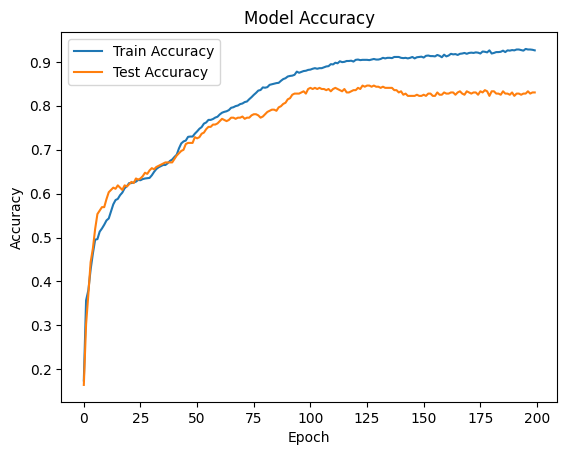

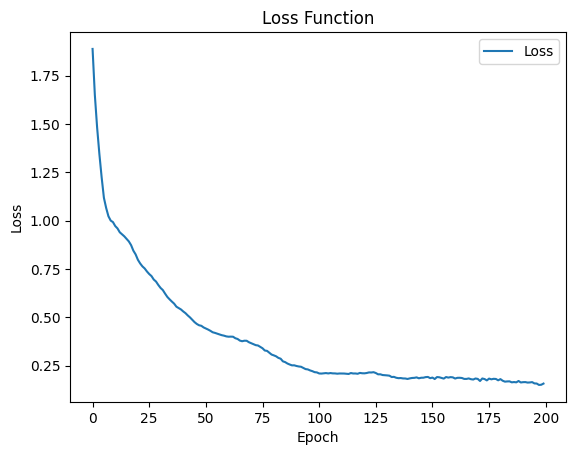

Epochs: 200 - Batch Size: 10 - Learning Rate: 0.01
Epoch 1/200 - Train Accuracy: 0.4598 - Test Accuracy: 0.4961 - Loss: 1.1544
Epoch 11/200 - Train Accuracy: 0.8470 - Test Accuracy: 0.7990 - Loss: 0.4903
Epoch 21/200 - Train Accuracy: 0.8568 - Test Accuracy: 0.7990 - Loss: 0.3440
Epoch 31/200 - Train Accuracy: 0.8954 - Test Accuracy: 0.8381 - Loss: 0.1936
Epoch 41/200 - Train Accuracy: 0.9117 - Test Accuracy: 0.8407 - Loss: 0.2203
Epoch 51/200 - Train Accuracy: 0.8940 - Test Accuracy: 0.8433 - Loss: 0.3511
Epoch 61/200 - Train Accuracy: 0.8313 - Test Accuracy: 0.7807 - Loss: 0.2123
Epoch 71/200 - Train Accuracy: 0.8927 - Test Accuracy: 0.8512 - Loss: 0.2201
Epoch 81/200 - Train Accuracy: 0.8712 - Test Accuracy: 0.8277 - Loss: 0.1444
Epoch 91/200 - Train Accuracy: 0.8816 - Test Accuracy: 0.8225 - Loss: 0.1875
Epoch 101/200 - Train Accuracy: 0.9039 - Test Accuracy: 0.8486 - Loss: 0.1973
Epoch 111/200 - Train Accuracy: 0.8940 - Test Accuracy: 0.8381 - Loss: 0.1428
Epoch 121/200 - Train Ac

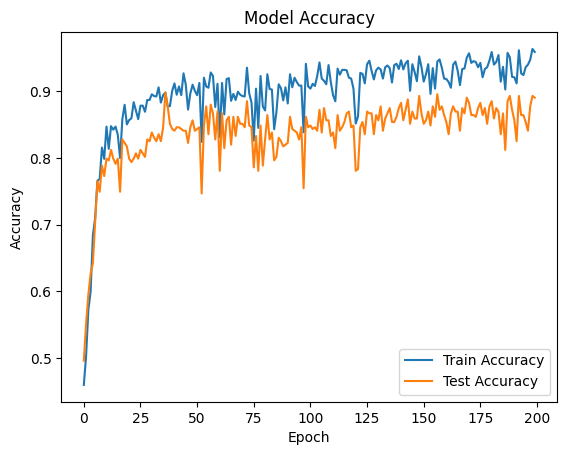

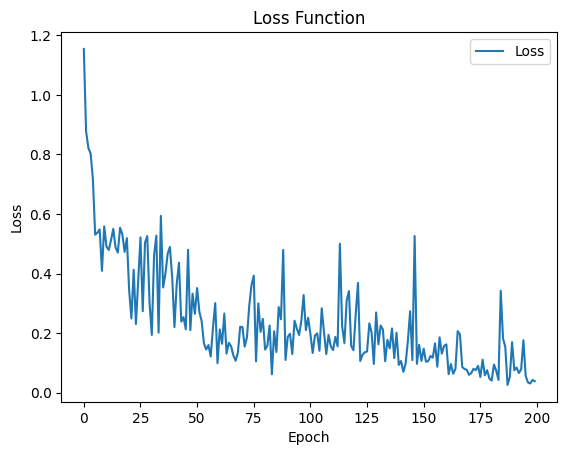

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt


epochs_array = [100, 200]
batch_size_array = [1, 5, 10]
learning_rate_array = [0.00001, 0.0001, 0.001, 0.01]

for epoch_value in epochs_array:
    for batch_size_value in batch_size_array:
        for learning_rate_value in learning_rate_array:
            print(f'Epochs: {epoch_value} - Batch Size: {batch_size_value} - Learning Rate: {learning_rate_value}')
            model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1, learning_rate_init=learning_rate_value, learning_rate='constant', random_state=42)

            epochs = epoch_value
            batch_size = batch_size_value
            train_accuracy = []
            test_accuracy = []
            loss_values = []
            num_batches = len(X_train_patient) // batch_size

            for epoch in range(epochs):
                for batch in range(num_batches):
                    start_idx = batch * batch_size
                    end_idx = (batch + 1) * batch_size
                    X_batch = X_train_patient[start_idx:end_idx]
                    y_batch = y_train_patient[start_idx:end_idx]

                    model.partial_fit(X_batch, y_batch, classes=np.unique(y_train_patient)) 

                train_acc = accuracy_score(y_train_patient, model.predict(X_train_patient))
                test_acc = accuracy_score(y_test_patient, model.predict(X_test_patient))
                train_accuracy.append(train_acc)
                test_accuracy.append(test_acc)
                loss_values.append(model.loss_)
                if epoch % 10 == 0:
                    print(f'Epoch {epoch + 1}/{epochs} - Train Accuracy: {train_acc:.4f} - Test Accuracy: {test_acc:.4f} - Loss: {model.loss_:.4f}')

            plt.plot(train_accuracy, label='Train Accuracy')
            plt.plot(test_accuracy, label='Test Accuracy')
            plt.title('Model Accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.show()

            plt.plot(loss_values, label='Loss')
            plt.title('Loss Function')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()
            plt.show()


    



Epoch 1/500 - Train Accuracy: 0.4290 - Test Accuracy: 0.4413 - Loss: 1.3688
Epoch 11/500 - Train Accuracy: 0.7077 - Test Accuracy: 0.7076 - Loss: 0.5006
Epoch 21/500 - Train Accuracy: 0.7986 - Test Accuracy: 0.7572 - Loss: 0.2808
Epoch 31/500 - Train Accuracy: 0.8921 - Test Accuracy: 0.8172 - Loss: 0.1487
Epoch 41/500 - Train Accuracy: 0.9222 - Test Accuracy: 0.8329 - Loss: 0.1551
Epoch 51/500 - Train Accuracy: 0.9202 - Test Accuracy: 0.8564 - Loss: 0.1210
Epoch 61/500 - Train Accuracy: 0.9294 - Test Accuracy: 0.8590 - Loss: 0.1156
Epoch 71/500 - Train Accuracy: 0.9058 - Test Accuracy: 0.8564 - Loss: 0.1206
Epoch 81/500 - Train Accuracy: 0.9248 - Test Accuracy: 0.8512 - Loss: 0.1652
Epoch 91/500 - Train Accuracy: 0.9261 - Test Accuracy: 0.8407 - Loss: 0.0565
Epoch 101/500 - Train Accuracy: 0.9248 - Test Accuracy: 0.8642 - Loss: 0.0904
Epoch 111/500 - Train Accuracy: 0.9209 - Test Accuracy: 0.8564 - Loss: 0.0840
Epoch 121/500 - Train Accuracy: 0.9176 - Test Accuracy: 0.8407 - Loss: 0.09

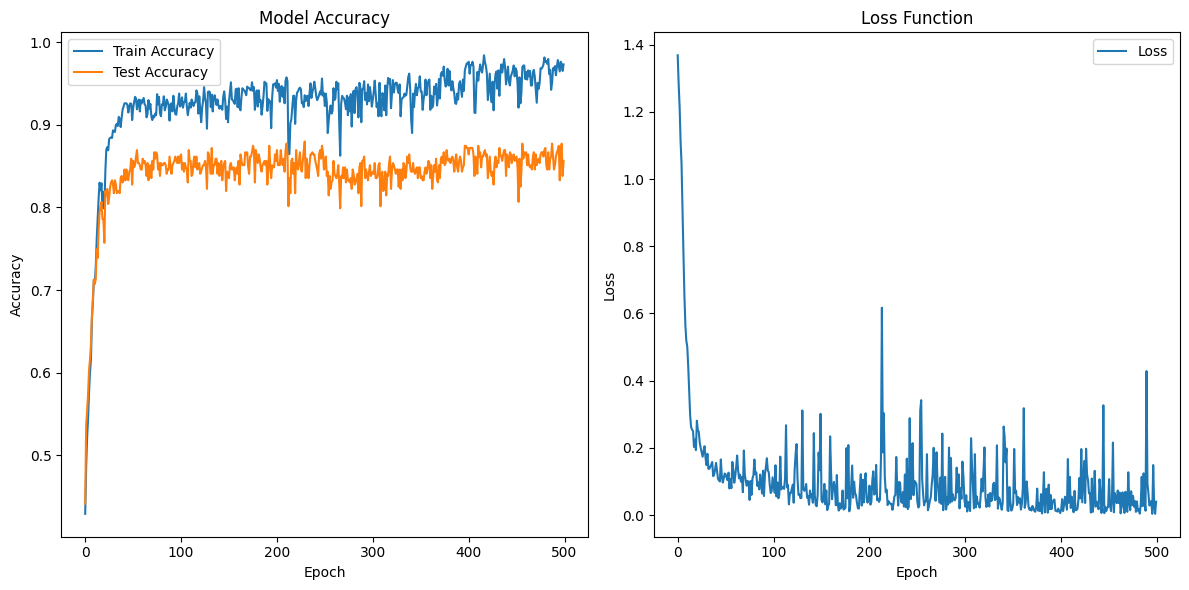

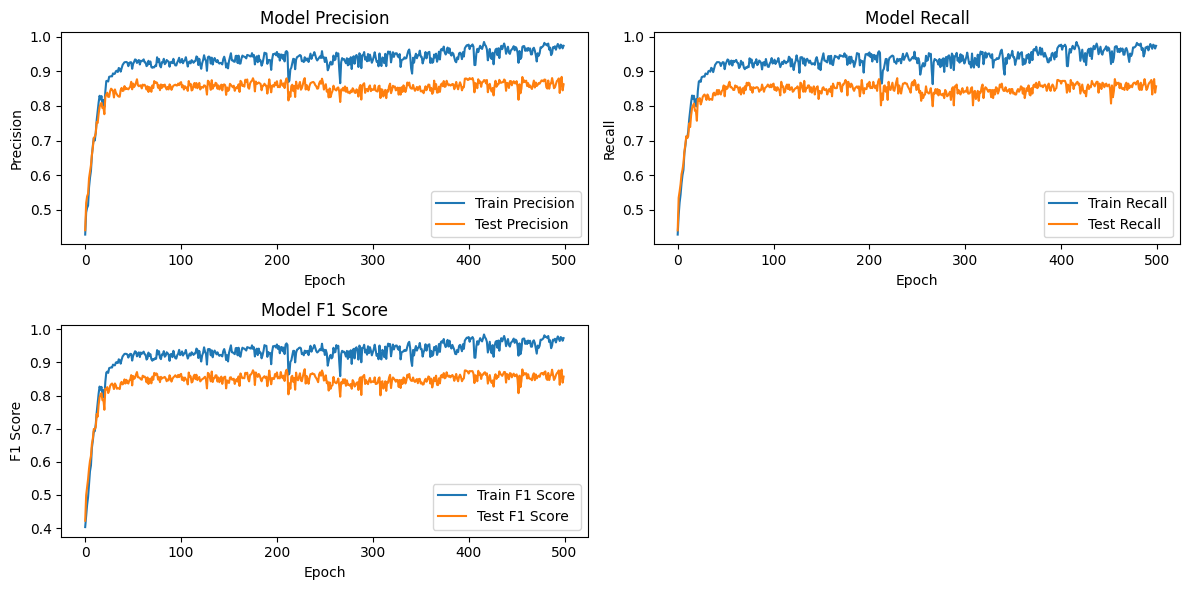

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1, learning_rate_init=0.01, learning_rate='constant', random_state=42)

epochs = 500
batch_size = 10
train_accuracy = []
test_accuracy = []
train_precision = []
test_precision = []
train_recall = []
test_recall = []
train_f1 = []
test_f1 = []
loss_values = []

num_batches = len(X_train_patient) // batch_size

for epoch in range(epochs):
    for batch in range(num_batches):
        start_idx = batch * batch_size
        end_idx = (batch + 1) * batch_size
        X_batch = X_train_patient[start_idx:end_idx]
        y_batch = y_train_patient[start_idx:end_idx]
        
        model.partial_fit(X_batch, y_batch, classes=np.unique(y_train_patient)) 
    
    y_train_pred = model.predict(X_train_patient)
    y_test_pred = model.predict(X_test_patient)
    
    train_acc = accuracy_score(y_train_patient, y_train_pred)
    test_acc = accuracy_score(y_test_patient, y_test_pred)
    
    train_precision.append(precision_score(y_train_patient, y_train_pred, average='weighted'))
    test_precision.append(precision_score(y_test_patient, y_test_pred, average='weighted'))
    
    train_recall.append(recall_score(y_train_patient, y_train_pred, average='weighted'))
    test_recall.append(recall_score(y_test_patient, y_test_pred, average='weighted'))
    
    train_f1.append(f1_score(y_train_patient, y_train_pred, average='weighted'))
    test_f1.append(f1_score(y_test_patient, y_test_pred, average='weighted'))
    
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    loss_values.append(model.loss_)
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch + 1}/{epochs} - Train Accuracy: {train_acc:.4f} - Test Accuracy: {test_acc:.4f} - Loss: {model.loss_:.4f}')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss_values, label='Loss')
plt.title('Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(train_precision, label='Train Precision')
plt.plot(test_precision, label='Test Precision')
plt.title('Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(train_recall, label='Train Recall')
plt.plot(test_recall, label='Test Recall')
plt.title('Model Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

# Plot F1 score
plt.subplot(2, 2, 3)
plt.plot(train_f1, label='Train F1 Score')
plt.plot(test_f1, label='Test F1 Score')
plt.title('Model F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/500 - Train Accuracy: 0.7196 - Test Accuracy: 0.7393 - Loss: 0.6367
Epoch 11/500 - Train Accuracy: 0.8598 - Test Accuracy: 0.8392 - Loss: 0.3244
Epoch 21/500 - Train Accuracy: 0.9168 - Test Accuracy: 0.9000 - Loss: 0.2256
Epoch 31/500 - Train Accuracy: 0.9350 - Test Accuracy: 0.9186 - Loss: 0.1798
Epoch 41/500 - Train Accuracy: 0.9436 - Test Accuracy: 0.9244 - Loss: 0.1565
Epoch 51/500 - Train Accuracy: 0.9503 - Test Accuracy: 0.9323 - Loss: 0.1424
Epoch 61/500 - Train Accuracy: 0.9540 - Test Accuracy: 0.9354 - Loss: 0.1336
Epoch 71/500 - Train Accuracy: 0.9556 - Test Accuracy: 0.9351 - Loss: 0.1260
Epoch 81/500 - Train Accuracy: 0.9583 - Test Accuracy: 0.9340 - Loss: 0.1198
Epoch 91/500 - Train Accuracy: 0.9593 - Test Accuracy: 0.9354 - Loss: 0.1150
Epoch 101/500 - Train Accuracy: 0.9609 - Test Accuracy: 0.9344 - Loss: 0.1115
Epoch 111/500 - Train Accuracy: 0.9633 - Test Accuracy: 0.9378 - Loss: 0.1065
Epoch 121/500 - Train Accuracy: 0.9638 - Test Accuracy: 0.9382 - Loss: 0.10

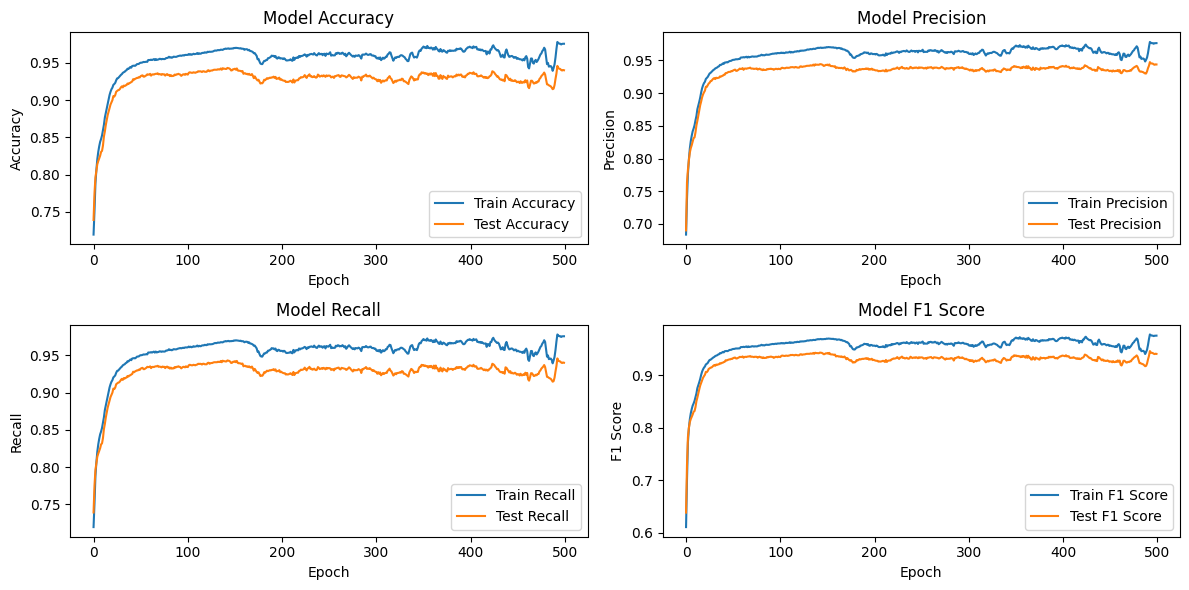

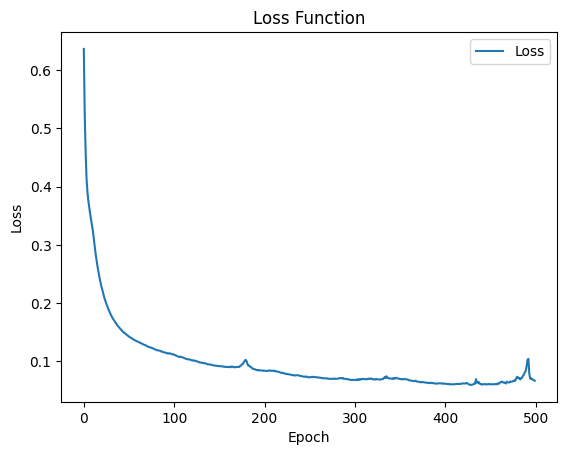

In [14]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

abnormal = pd.read_csv("ptbdb_abnormal_data.csv", header=None)
normal = pd.read_csv("ptbdb_normal_data.csv", header=None)

mixed_dataset = pd.concat([abnormal, normal], sort=True)

X_train, X_test, y_train, y_test = train_test_split(mixed_dataset.drop([187], axis=1), mixed_dataset[187], test_size=0.2, random_state=42)

model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1, warm_start=True, random_state=42)

epochs = 500
batch_size = 10
train_accuracy = []
test_accuracy = []
train_precision = []
test_precision = []
train_recall = []
test_recall = []
train_f1 = []
test_f1 = []
loss_values = []

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

for epoch in range(epochs):
    model.partial_fit(X_train, y_train, classes=np.unique(y_train)) 
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    train_precision.append(precision_score(y_train, y_train_pred, average='weighted'))
    test_precision.append(precision_score(y_test, y_test_pred, average='weighted'))
    
    train_recall.append(recall_score(y_train, y_train_pred, average='weighted'))
    test_recall.append(recall_score(y_test, y_test_pred, average='weighted'))
    
    train_f1.append(f1_score(y_train, y_train_pred, average='weighted'))
    test_f1.append(f1_score(y_test, y_test_pred, average='weighted'))
    
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    loss_values.append(model.loss_)
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch + 1}/{epochs} - Train Accuracy: {train_acc:.4f} - Test Accuracy: {test_acc:.4f} - Loss: {model.loss_:.4f}')

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(train_precision, label='Train Precision')
plt.plot(test_precision, label='Test Precision')
plt.title('Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(train_recall, label='Train Recall')
plt.plot(test_recall, label='Test Recall')
plt.title('Model Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(train_f1, label='Train F1 Score')
plt.plot(test_f1, label='Test F1 Score')
plt.title('Model F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure()
plt.plot(loss_values, label='Loss')
plt.title('Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
